<a href="https://colab.research.google.com/github/andres123o/100-tifico.com/blob/main/Marketing_Clustering_Compain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Context
### Problem Statement
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Goal

To apply the best market strategy, it’s important to understand the customer. In this case, we’re using the K-Means unsupervised learning method. The main goal is to discover and categorize customers into several groups based on various features. The ultimate goal is to provide information about the specific preferences and characteristics of each group.

### ML Method

- We will scaling data for better performance
- Before building model we will use PCA for dimensionality


##Content
###Attributes

###People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

###Products

- MntWines: Amount spent on wine in last 2 years
-MntFruits: Amount spent on fruits in last 2 years
-MntMeatProducts: Amount spent on meat in last 2 years
-MntFishProducts: Amount spent on fish in last 2 years
-MntSweetProducts: Amount spent on sweets in last 2 years
-MntGoldProds: Amount spent on gold in last 2 years

###Promotion

- NumDealsPurchases: Number of purchases made with a discount
-AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
-AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
-AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
-AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
-AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
-Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

###Place

- NumWebPurchases: Number of purchases made through the company’s website
-NumCatalogPurchases: Number of purchases made using a catalogue
-NumStorePurchases: Number of purchases made directly in stores
-NumWebVisitsMonth: Number of visits to company’s website in the last month

###Target

- Need to perform clustering to summarize customer segments.

In [ ]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # allows you to create a color palette from a list of colors.
import seaborn as sns
from matplotlib import colors
sns.set(style = 'whitegrid')

# Import the neccesary libraries for building model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # These are used for converting categorical data into numerical data.
from sklearn.decomposition import PCA #  PCA is used for dimensionality reduction in data.
from sklearn.cluster import KMeans # KMeans is a clustering algorithm used to group data into k clusters.
from sklearn.preprocessing import StandardScaler, MinMaxScaler # These are used for scaling features in data preprocessing.
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# scipy
from scipy.stats import pointbiserialr # This function is used to calculate the Point Biserial correlation.

# Method Elbow
from yellowbrick.cluster import KElbowVisualizer # This class is used for visualizing the "elbow" method to select the optimal number of clusters in KMeans clustering.
from sklearn.exceptions import ConvergenceWarning #  This is used to handle warnings related to convergence in iterative algorithms.


In [ ]:
# Import the DataSet from google Drive
from google.colab import drive

# Link drive
drive.mount('/content/drive')
# link file
ruta_archivo = '/content/drive/My Drive/db/marketing_campaign.csv'
# Save data
df = pd.read_csv(ruta_archivo, sep = '\t')

Mounted at /content/drive


# EXPLORATORY DATA ANALYSYS (EDA)

## 1. Data Inspectation

In [ ]:
pd.set_option('display.max_columns', None) # Show all columns
df.head(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   
5  7446        1967      Master       Together  62513.0        0         1   
6   965        1971  Graduation       Divorced  55635.0        0         1   
7  6177        1985         PhD        Married  33454.0        1         0   
8  4855        1974         PhD       Together  30351.0        1         0   
9  5899        1950         PhD       Together   5648.0        1         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   
5  09-09-2013       16       520         42               98                0   
6  13-11-2012       34       235         65              164               50   
7  08-05-2013       32        76         10               56                3   
8  06-06-2013       19        14          0               24                3   
9  13-03-2014       68        28          0                6                1   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   
5                42            14                  2                6   
6                49            27                  4                7   
7                 1            23                  2                4   
8                 3             2                  1                3   
9                 1            13                  1                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   
5                    4                 10                  6             0   
6                    3                  7                  6             0   
7                    0                  4                  8             0   
8                    0                  2                  9             0   
9                    0                  0                 20             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   
5             0             0             0             0         0   
6             0             0             0             0         0   
7             0        

In [ ]:
# Look the categorical variables like as Education and Marital_status, for better understanding
education_categories = df['Education'].value_counts()
print(education_categories)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [ ]:
# Look the categorical variables like as Education and Marital_status, for better understanding
education_categories = df['Marital_Status'].value_counts()
print(education_categories)

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [ ]:
# Show basic info about the dataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Look basic statistic
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

In [ ]:
# Look if exist any N/A value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# Look if exist any duplicated value
df.duplicated().sum()

0

## What did I see?
- The dataSet has 2240 samples and 29 features
- There are 4 areas: People, Products, Promotions and PLaces
- There are severals features that provide no information sush as Complain,	Z_CostContact,	Z_Revenue and ID
- There are variables that can be transformed to a single variable such as the number of children in the household and the acceptance of campaigns.
- In Marital_Status we can transform in 2 categories for better performance

- We can see that there aren't Duplicated values, but there are 24 NA values on Income

### We've already the inspectation, now go ahead with Data Cleaning

## 2. Data Cleaning and New Features


### We need remove NA values, convert Dt_customer to only number month, drop the irrelevant columns and to unify certain variables such as the acceptance of the campaign and also to transform the number of children in the household to a single variable, and to transform the variable Marital status to single or married without further categories. All this in order to reduce dimensionality.

In [ ]:
# Drop de N/A values on Income
df.dropna(inplace = True)

In [ ]:
# Drop ID, Z_CostContact and Z_revenue, provide no information
df.drop(['Z_CostContact', 'Z_Revenue', 'ID'], axis = 1, inplace = True)

In [ ]:
# Convert Dt_customer into New feature with only number of month
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df['Dt_Customer'] = df['Dt_Customer'].dt.month

In [ ]:
# Convert Birth_Year into Year old
year_cal = 2020
df['Age'] = year_cal - df['Year_Birth']

# Drop irrelevant Year_Birth
df.drop(['Year_Birth'], axis = 1, inplace = True)

In [ ]:
# Transforms Kidhome and Teenhome into a single function
df['Total_children'] = df['Kidhome'] + df['Teenhome']

# Drop irrelevants variables
df.drop(['Kidhome', 'Teenhome'], axis = 1, inplace = True)

In [ ]:
# Transform the variable Marital Status in 2 categories
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'Alone',
    'Divorced': 'Alone',
    'Widow': 'Alone',
    'Alone': 'Alone',
    'Absurd': 'Alone',
    'YOLO': 'Alone',
})

df['Marital_Status'].value_counts()

Partner    1430
Alone       786
Name: Marital_Status, dtype: int64

In [ ]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Total_children'],
      dtype='object')

In [ ]:
# We convert all acceptances of a campaign into a single 'I accept any campaign' variable.
df['Accepted_Campaigns'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# Drop irrelevant features
df.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], axis = 1, inplace = True)

In [ ]:
# Create for better analysis and Perform
df['Total_Purchase'] = df['NumCatalogPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']
df['Total_Mn'] = df['MntFishProducts'] + df['MntFruits'] + df['MntGoldProds'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']
df['Prents'] = np.where(df.Total_children > 0, 1, 0)

## 3. Get discrete and continouus features

### We need know wich features are discrete or continous for data visualization

In [ ]:
# We divide features by discrete and continous (won't work after PCA or Clustering)
col_cont = []
col_dis = []


# This secction is taken of the other project by JIESHENDS2020
def divide_feature_types(data):
        '''
        inpute a data frame and output continuous, and discrete feature columns in list format
        '''
        # Initialize
        col_cont=[]
        col_dis=[]
        # loop through and seperate columns
        for c in data.columns:
            if ('Education' in c) or ('Marital_Status' in c) or ('Complain' in c) or ('Accepted_Campaigns' in c) or ('Dt_Customer' in c) or ('Prents' in c):
                col_dis.append(c)
            elif (data[c].dtype=='O'):
                col_dis.append(c)
            else:
                col_cont.append(c)
        return col_cont, col_dis

col_cont, col_dis = divide_feature_types(df)
print('Continuous numerical features: ', col_cont)
print('Categorical or discrete features: ', col_dis)

Continuous numerical features:  ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_children', 'Total_Purchase', 'Total_Mn']
Categorical or discrete features:  ['Education', 'Marital_Status', 'Dt_Customer', 'Complain', 'Accepted_Campaigns', 'Prents']


In [ ]:
df['Marital_Status'].value_counts()

Partner    1430
Alone       786
Name: Marital_Status, dtype: int64

## 4. Data visualization and analysis



Reletive Plot Of Some Selected Features: A Data Subset


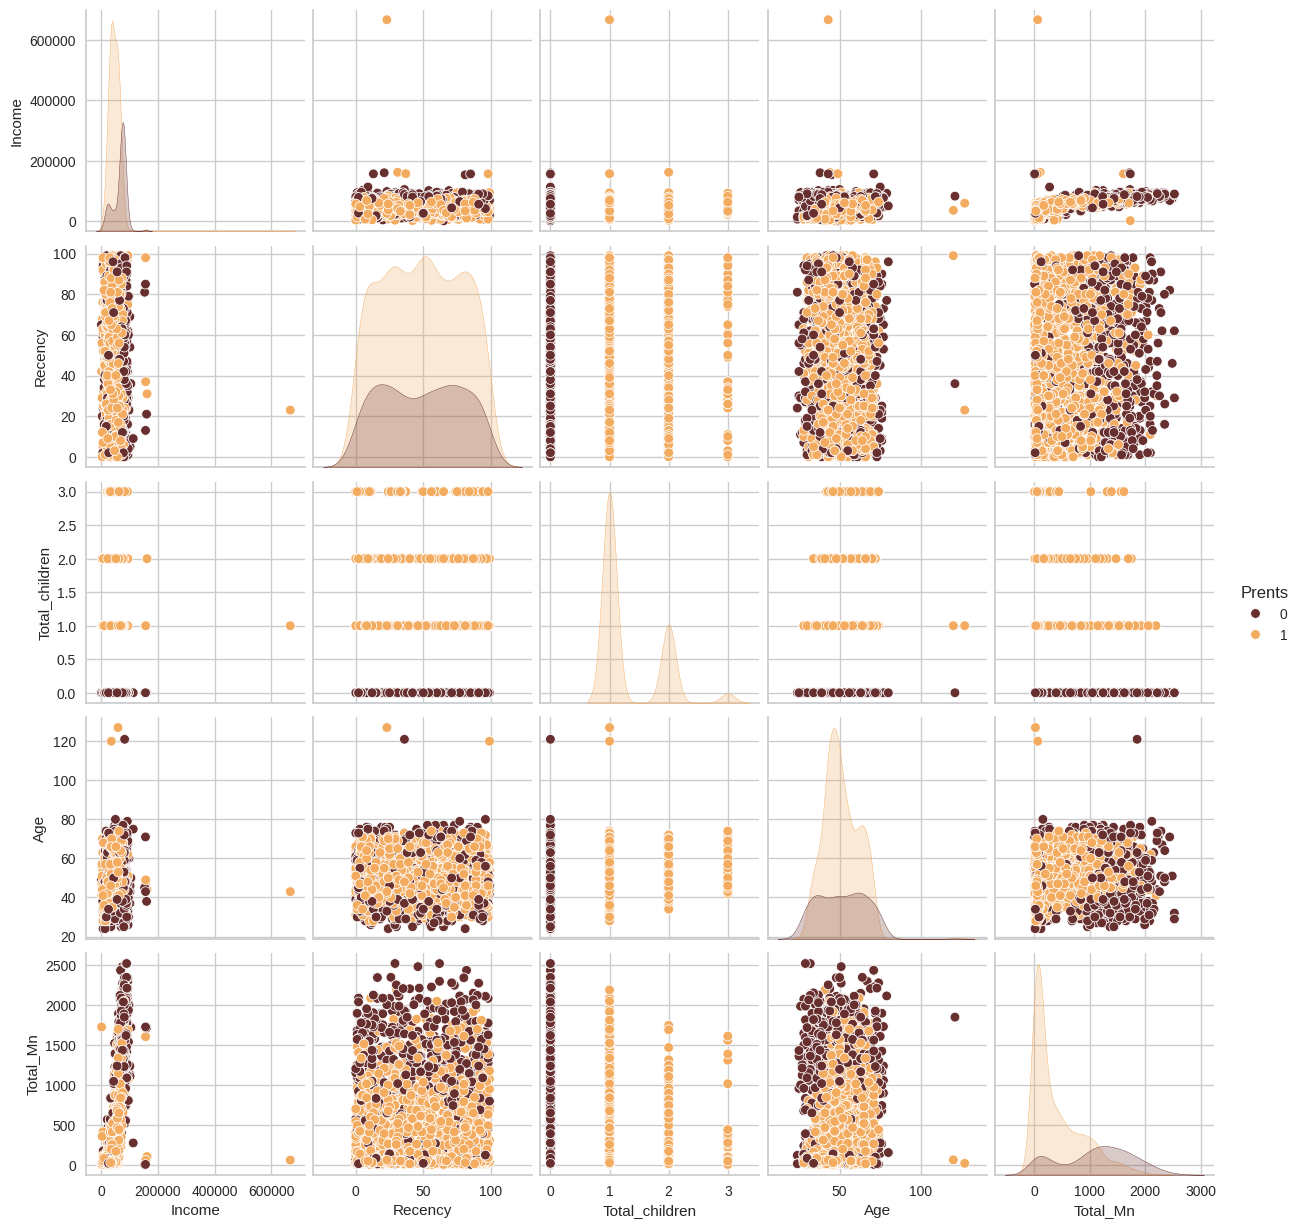

In [ ]:
# We create a pairplot analyzing the continuous variables and relating them to a discrete variable
To_Plot = [ "Income", "Recency", "Total_children", "Age", "Total_Mn", 'Prents']
print("Reletive Plot Of Some Selected Features: A Data Subset")
sns.pairplot(df[To_Plot], hue = 'Prents', palette= (["#682F2F","#F3AB60"]))

<ipython-input-22-f5ed239a74de>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, center = 0, cmap='coolwarm')


<Axes: >

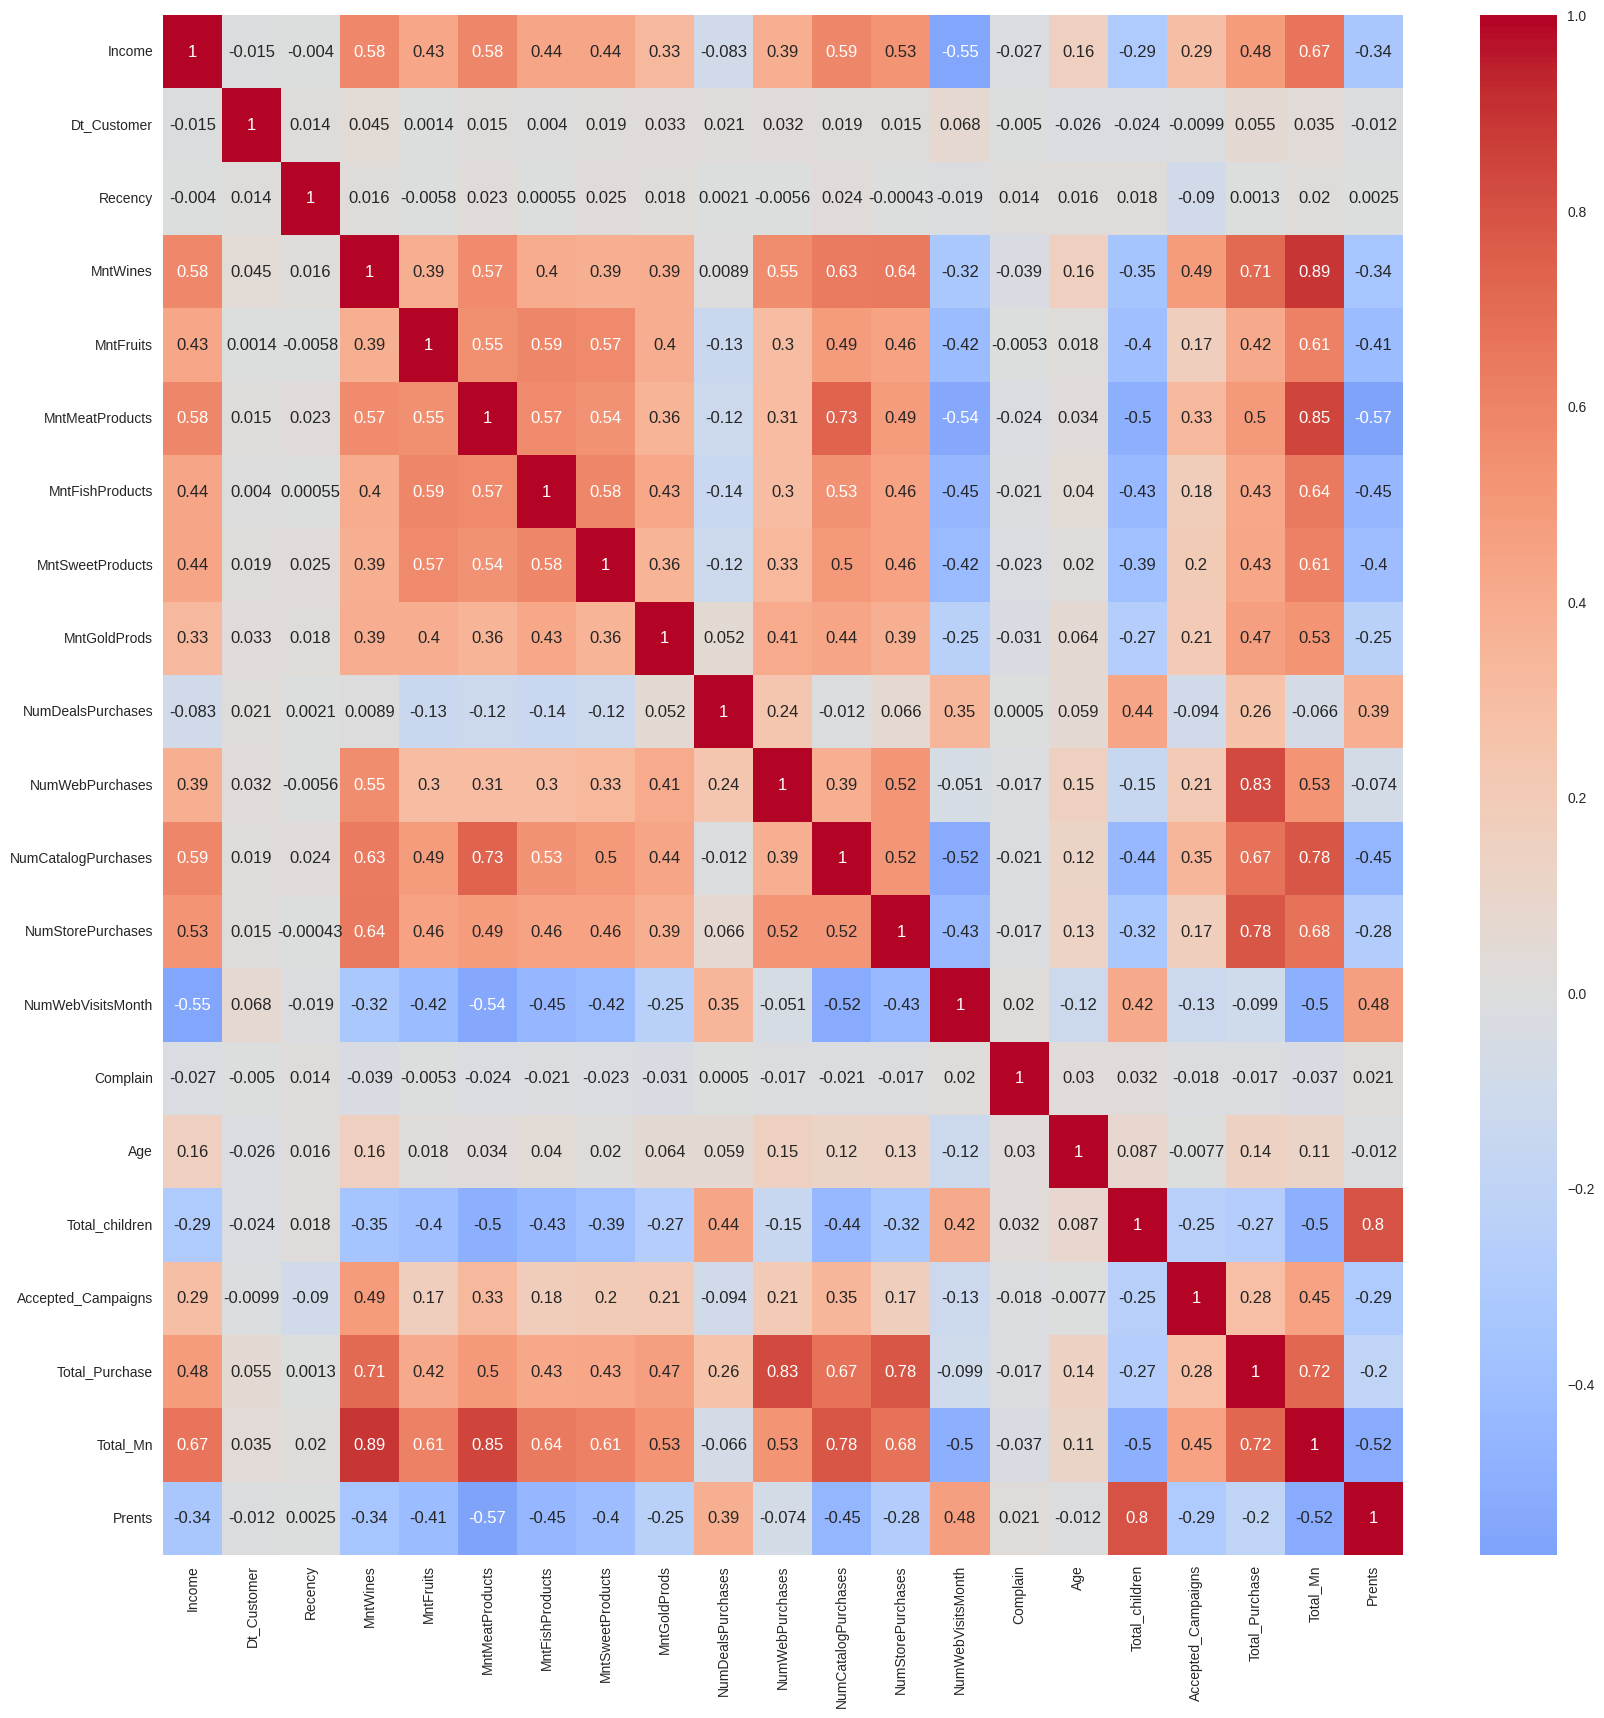

In [ ]:
# To create the correlation matriz
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, center = 0, cmap='coolwarm')

### We created a pairplot analyzing the continuous variables relating them to a discrete variable which is whether they are parents or not, we can see that there are outliers, in years and in income, we will have to do data cleaning again, as for the correlation we can see that there is no presence of multicollinearity.

## 2. Data Cleaning and New Features (REPEAT THIS STEP)

### Drop outlier in age and income



In [ ]:
# Drop outlier > 70 (AGE)
df = df[(df['Age'] < 80 )]

# Drop outlier > 150.000 (INCOME)
df = df[(df['Income'] < 150000)]

print('Total data', len(df))

Total data 2204


## 4. Data visualization and analysis (REPEAT THIS STEP)

Reletive Plot Of Some Selected Features: A Data Subset


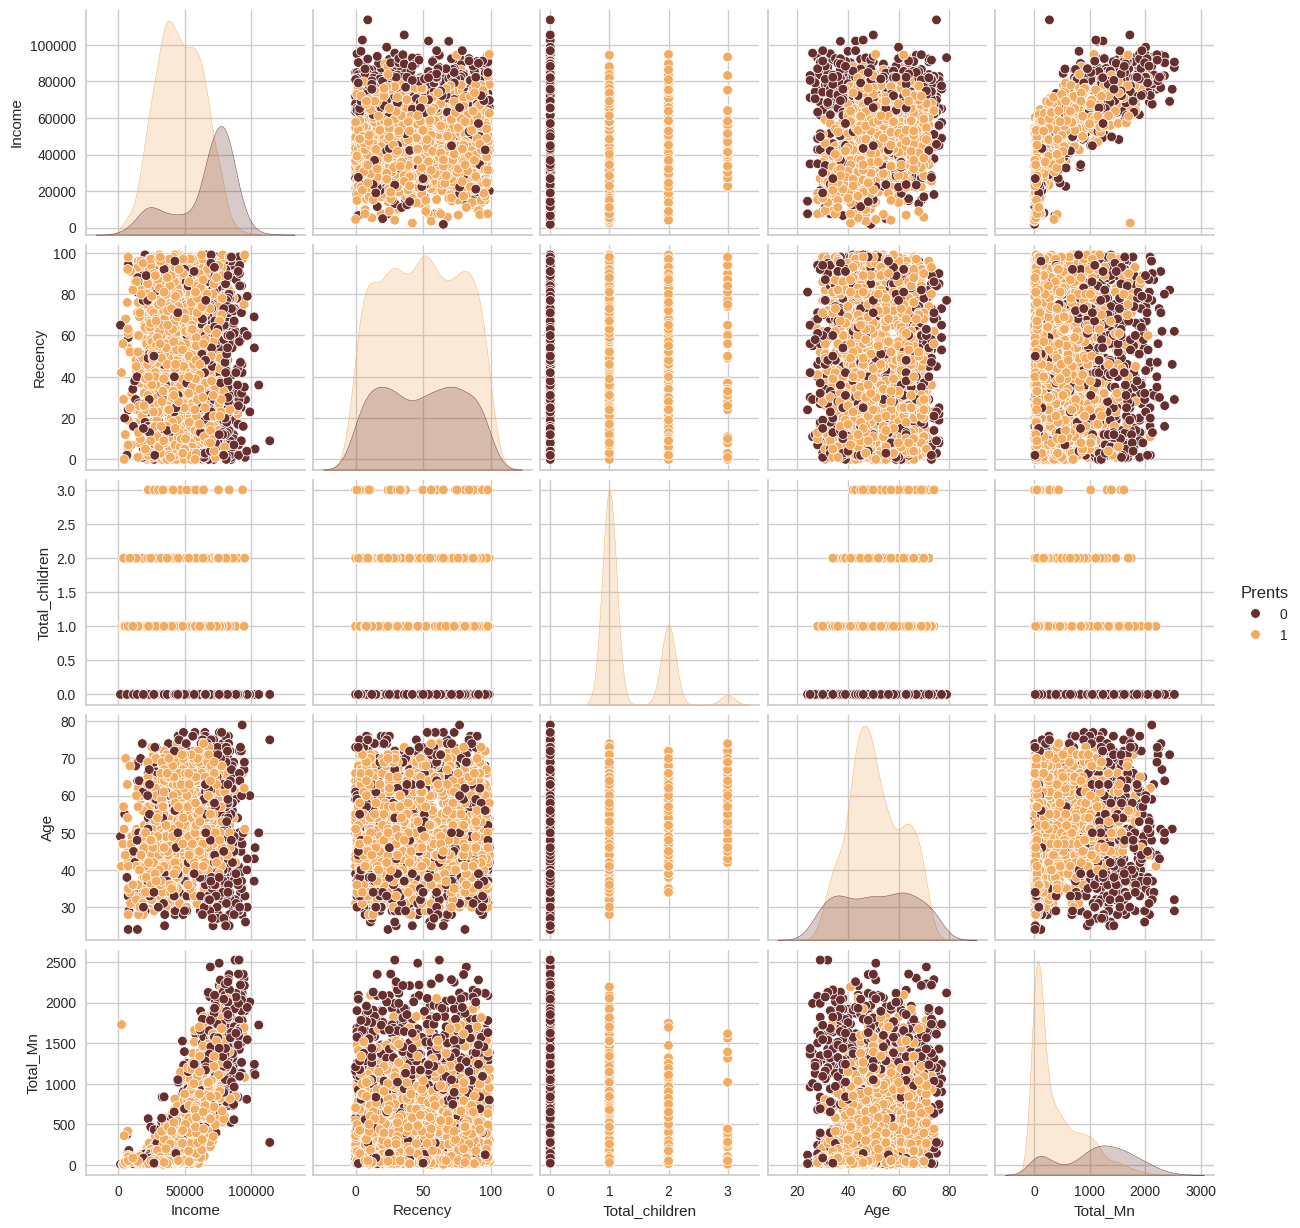

In [ ]:
# We create a pairplot analyzing the continuous variables and relating them to a discrete variable
To_Plot = [ "Income", "Recency", "Total_children", "Age", "Total_Mn", 'Prents']
print("Reletive Plot Of Some Selected Features: A Data Subset")
sns.pairplot(df[To_Plot], hue = 'Prents', palette= (["#682F2F","#F3AB60"]))

<ipython-input-25-f5ed239a74de>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, center = 0, cmap='coolwarm')


<Axes: >

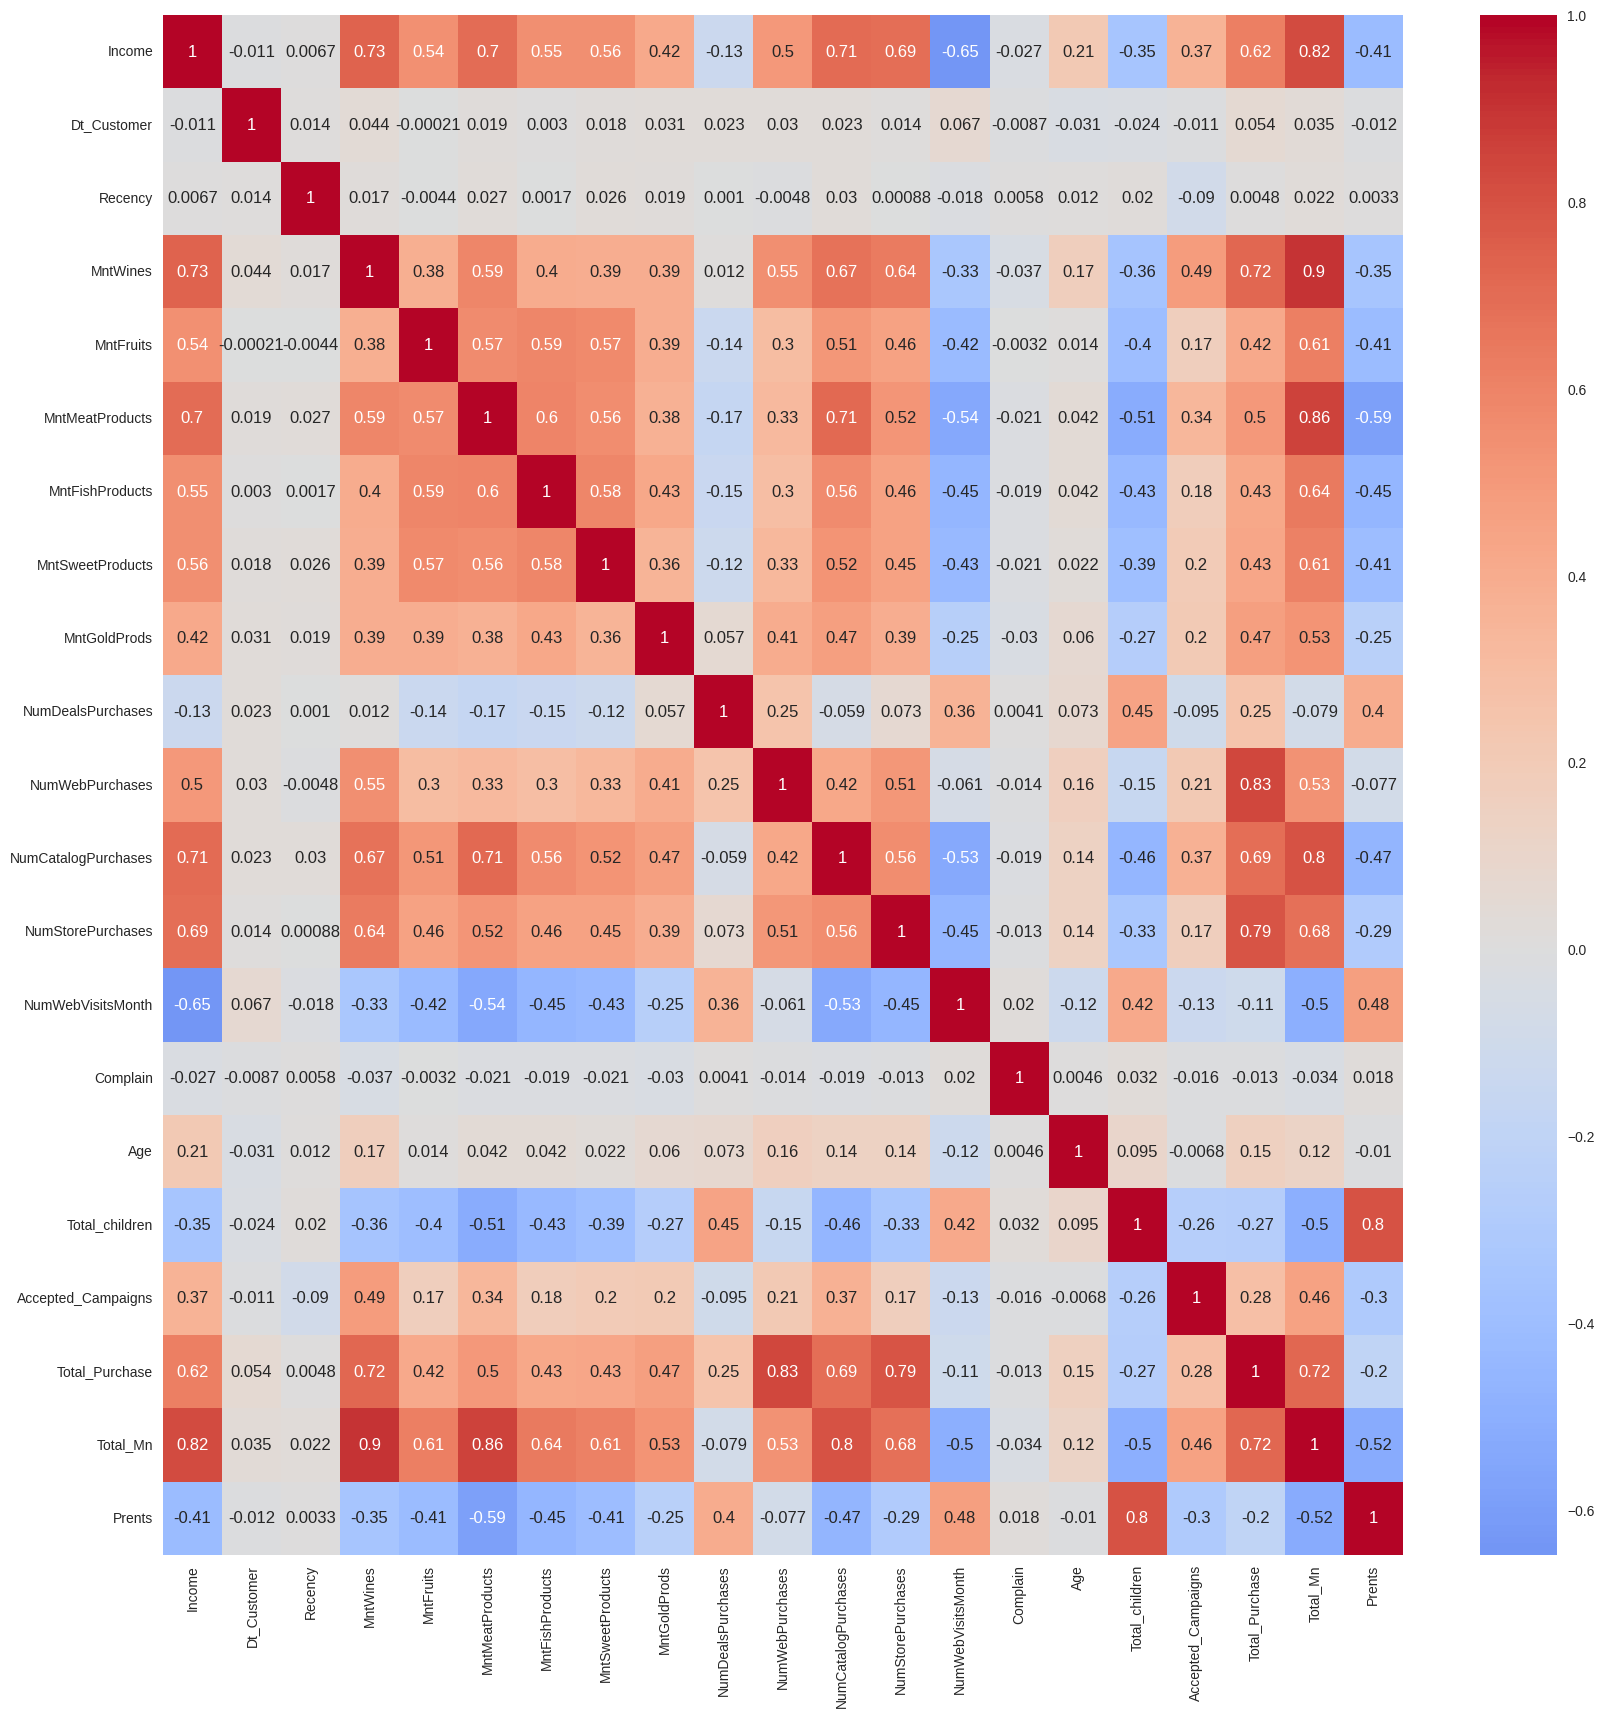

In [ ]:
# To create the correlation matriz
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, center = 0, cmap='coolwarm')

### We have removed the outliers from the data set, now go ahead with data preprocessing






# 5. Data Preprocessing

### In this section we will scalling data for better perfomance to data, also we will get the dummies for categorical variables.

In [ ]:
# Get categorical variables

# Asign model
le = LabelEncoder()

# Transform Education
df['Education'] = le.fit_transform(df['Education'])

# Transform Marital_Status
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

In [ ]:
# Scalling Data

# First create copy data
dt = df.copy()

# Drop irrelevant data
dt.drop(['Total_children', 'Total_Purchase', 'Total_Mn'], axis = 1, inplace = True)

# Asign model
scaler = StandardScaler()

# Train model
scaler.fit(dt)

# Create new scaler data
dt_scaler = pd.DataFrame(scaler.transform(dt), columns = dt.columns)

# 6. PCA - Principal Component Analysis

---



In [ ]:
# Assign model
pca = PCA(n_components=0.5)

# Train model
pca.fit(dt_scaler)

# New data PCA_Scales
dt_scaler_pca = pca.transform(dt_scaler)

In [ ]:
# Now, we analyze the variance of data_scaler_pca
var = pca.explained_variance_ratio_

# Show the variance of all features
print(len(var))
print(var)

3
[0.34774082 0.08760605 0.06489085]


1 componente: 34.77%
2 componente: 43.53%
3 componente: 50.02%


<ipython-input-207-44e1d7496517>:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r-x" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(cum_var, 'r-x', marker='X')


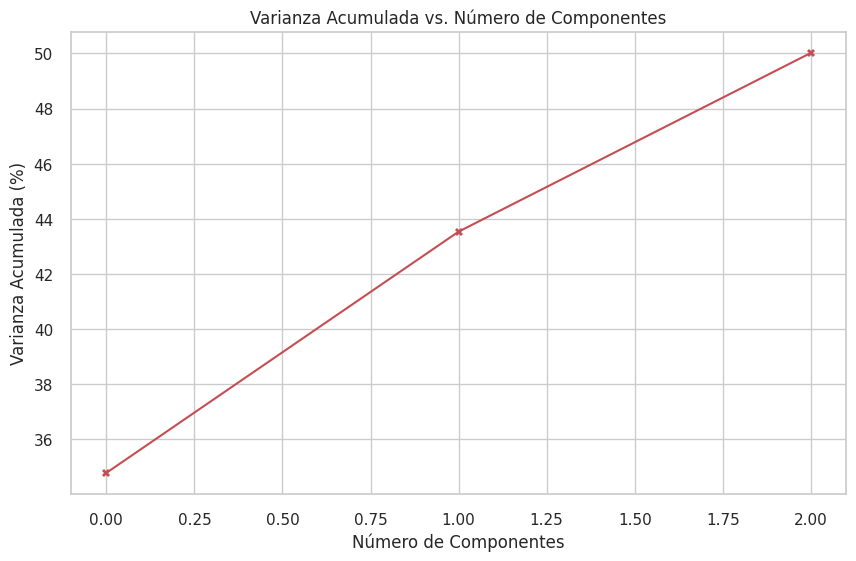

In [ ]:
# We show the best option to reduce the dimensionality, for this we plot the variance with which we will explore the best amount of characteristics that explain the variance of the data.
cum_var = np.cumsum(np.round(var, decimals = 4) * 100) # np.cumsum is the cumulative sum
# Show results
for i, acumulado in enumerate(cum_var, start=1):
    print(f"{i} componente: {acumulado:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(cum_var, 'r-x', marker='X')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada (%)')
plt.title('Varianza Acumulada vs. Número de Componentes')
plt.grid(True)
plt.show()

### We can determine that the number of features that explain most of the variance of the model is at 11, which is where the percentage of explana

In [ ]:
 # Drop features that don't explain the dataSet
 dt_scaler_pca = pd.DataFrame(dt_scaler_pca)

In [ ]:
# Show DataSet
dt_scaler_pca

0         1         2
0     4.372096  0.130675  1.053121
1    -2.403127 -0.598287 -0.942353
2     1.933306 -0.260167  0.203492
3    -2.767269 -0.875935  0.290475
4    -0.141081  0.930837  0.054674
...        ...       ...       ...
2199  2.193117  1.196162  2.008755
2200 -0.566369  3.575536 -1.208595
2201  2.002259 -0.747614 -0.643481
2202  1.680407  0.823134 -0.750553
2203 -1.805423  1.108172 -1.422010

[2204 rows x 3 columns]

)# 7. BUILDING - CLUSTERING - HIERARCHICAL

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

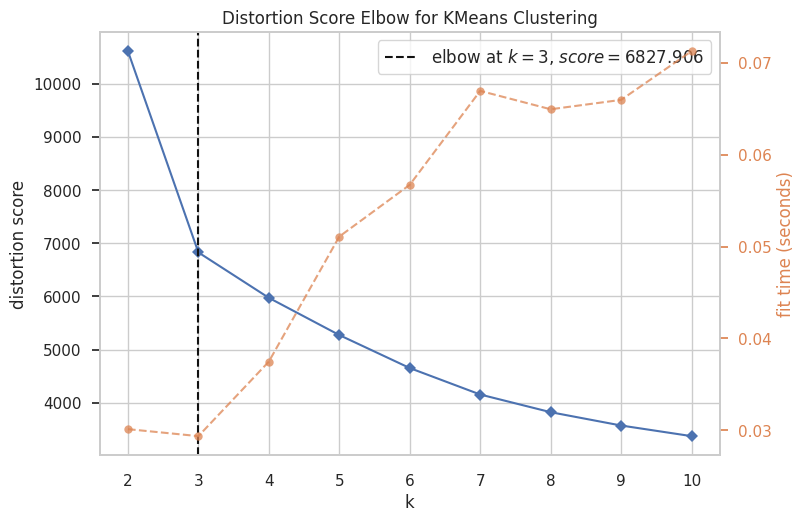

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method to determine the number of clusters to be formed
Elbow_method = KElbowVisualizer(KMeans(), k = 10)
Elbow_method.fit(dt_scaler_pca)
Elbow_method.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

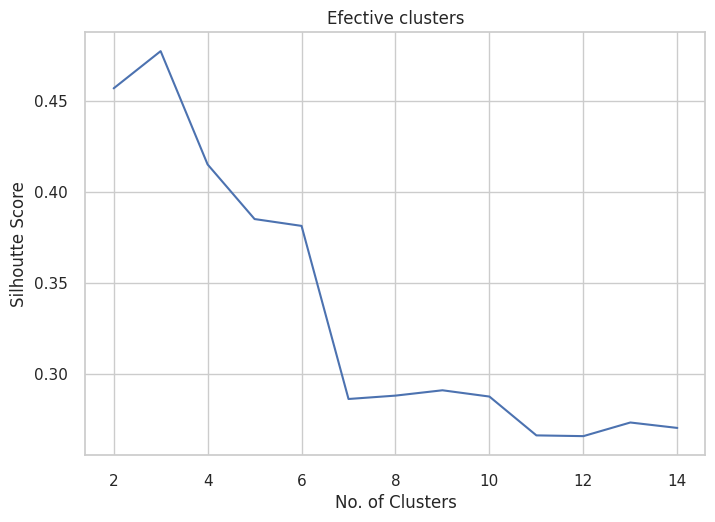

Podemos observar que efectivamente el numero mas apropiado para el modelo es de 4 Cluesters
EL numero que vamos a escoger es el que esta asociado con el coeficiente de silueta mas alto


In [ ]:
# Ahora vamos hallar el numero de K mas efectivo para el modelo, usaremos el coeficiente de la silueta
silhoutte_score = []
# Rango de Evaluacion
K = range(2, 15)
# Iteramos por cada valor de k
for i in K:
  km = KMeans(n_clusters = i)
  km = km.fit(dt_scaler_pca)
  y = km.fit_predict(dt_scaler_pca)
  silhoutte_score.append(silhouette_score(dt_scaler_pca, y))

# Visualizamos los datos
plt.plot(K, silhoutte_score, 'bx-')
plt.title('Efective clusters')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhoutte Score')
plt.show()

print('Podemos observar que efectivamente el numero mas apropiado para el modelo es de 4 Cluesters')
print('EL numero que vamos a escoger es el que esta asociado con el coeficiente de silueta mas alto')

### four is the optimal number of clusters for this data set.

In [ ]:
dt_scaler_pca.columns = dt_scaler_pca.columns.astype(str)
#Initiating the Agglomerative Clustering model
hierarchical_model2 = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
y = hierarchical_model2.fit_predict(dt_scaler_pca)
dt_scaler_pca["Clusters"] = y
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= y

In [ ]:
df['Clusters'].value_counts()

2    883
0    830
1    491
Name: Clusters, dtype: int64

# 8. Evaluating model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4366777604241679


<ipython-input-216-f1abeb24be0f>:84: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data = df, x = 'Total_Mn', y = 'Income', hue = 'Clusters', palette=["#682F2F", "#F3AB60", "#58A4B0", "yellow"])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.4705495940310085


<ipython-input-216-f1abeb24be0f>:84: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data = df, x = 'Total_Mn', y = 'Income', hue = 'Clusters', palette=["#682F2F", "#F3AB60", "#58A4B0", "yellow"])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.40204361966110763


<ipython-input-216-f1abeb24be0f>:84: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data = df, x = 'Total_Mn', y = 'Income', hue = 'Clusters', palette=["#682F2F", "#F3AB60", "#58A4B0", "yellow"])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.3862285398273334


<ipython-input-216-f1abeb24be0f>:84: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data = df, x = 'Total_Mn', y = 'Income', hue = 'Clusters', palette=["#682F2F", "#F3AB60", "#58A4B0", "yellow"])


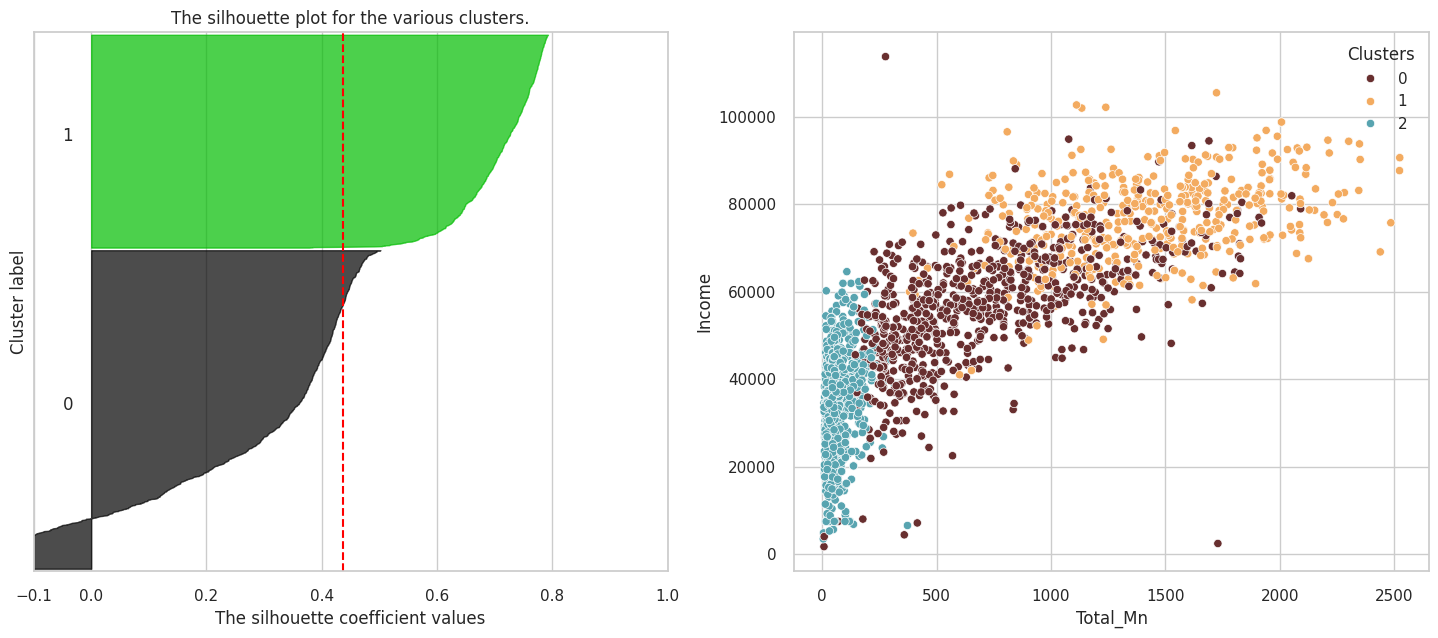

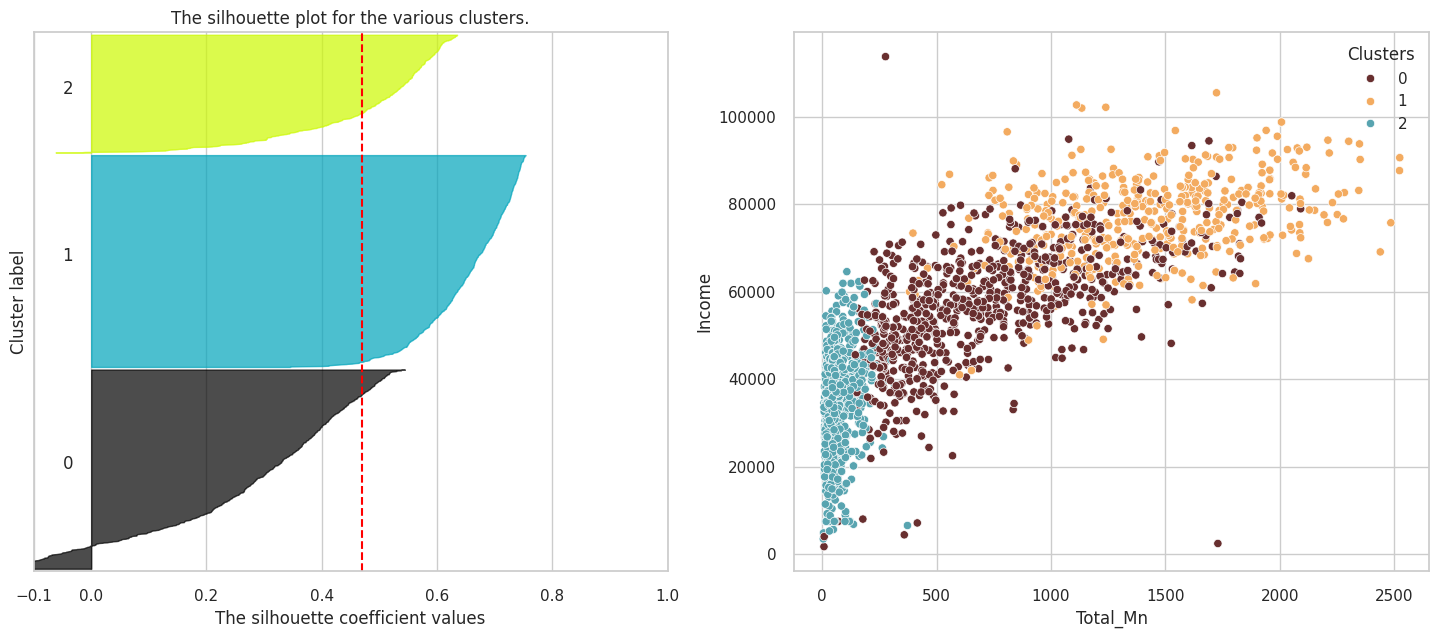

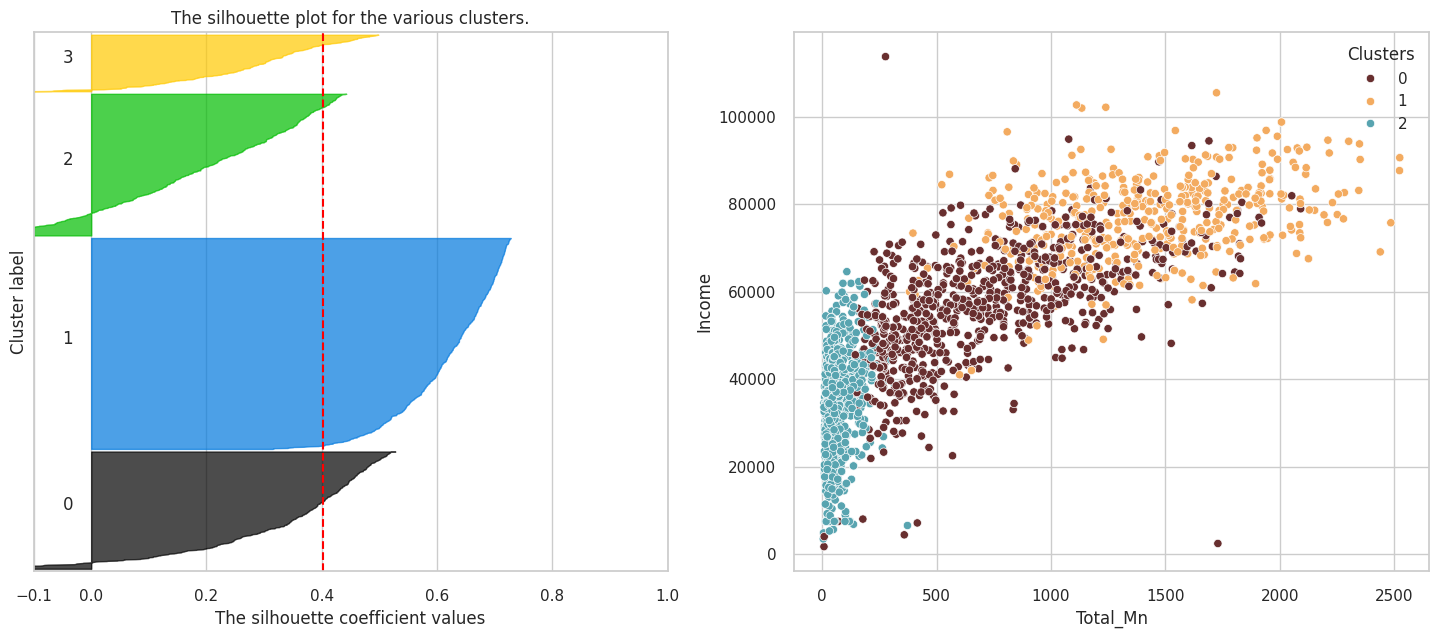

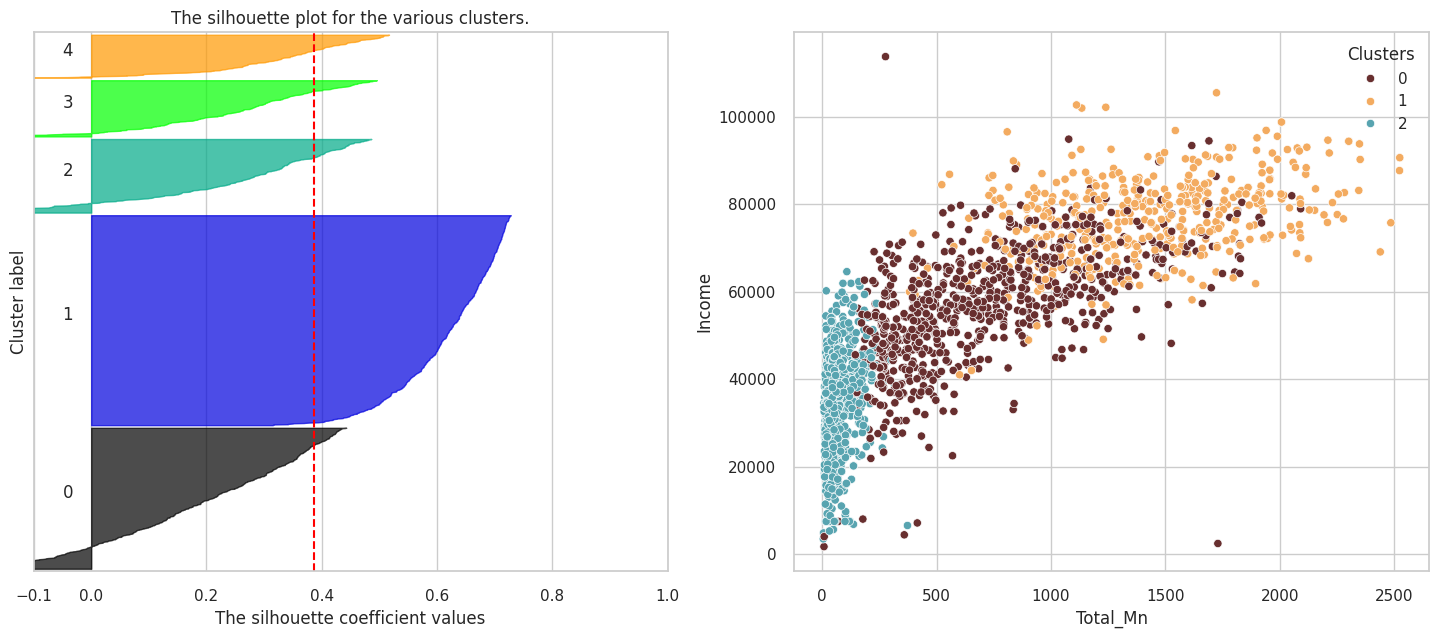

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2,3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dt_scaler_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clustererO = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clustererO.fit_predict(dt_scaler_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dt_scaler_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dt_scaler_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    sns.scatterplot(data = df, x = 'Total_Mn', y = 'Income', hue = 'Clusters', palette=["#682F2F", "#F3AB60", "#58A4B0", "yellow"])


plt.show()

<ipython-input-217-3278306d57ac>:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(data = df, x = 'Total_Mn', y = 'Income', hue = 'Clusters', palette=["#682F2F", "#F3AB60", "#58A4B0", "yellow"])


<Axes: xlabel='Total_Mn', ylabel='Income'>

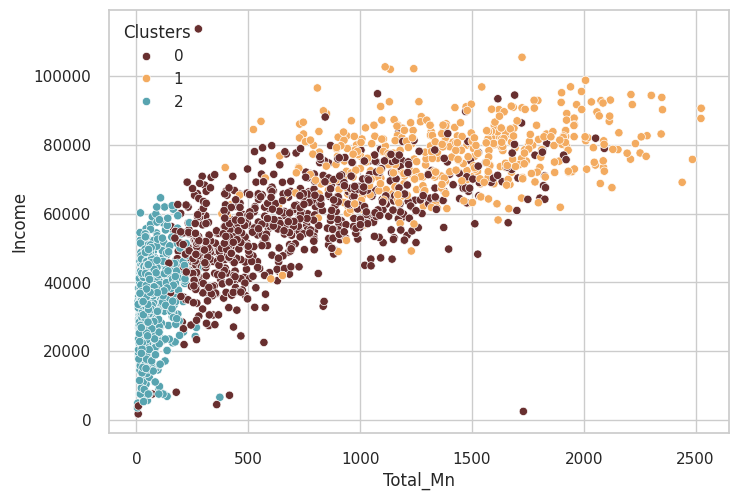

In [ ]:
#Plotting the clusters
sns.scatterplot(data = df, x = 'Total_Mn', y = 'Income', hue = 'Clusters', palette=["#682F2F", "#F3AB60", "#58A4B0", "yellow"])

Reletive Plot Of Some Selected Features: A Data Subset


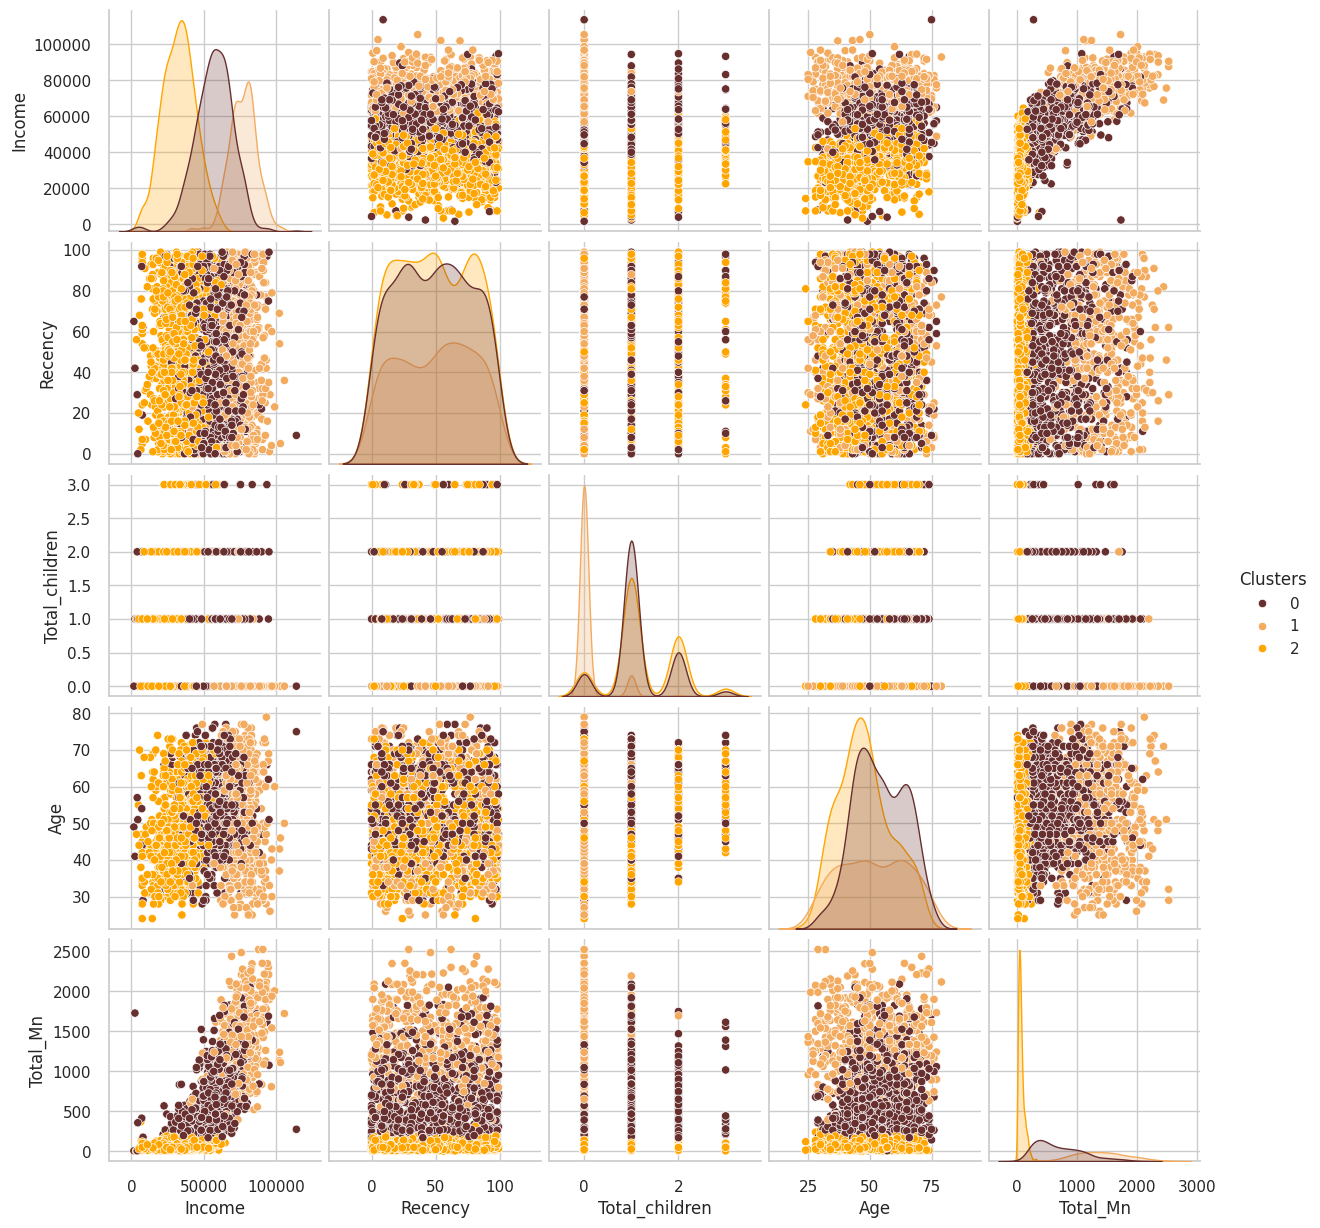

In [ ]:
# We create a pairplot analyzing the continuous variables and relating them to a discrete variable
To_Plot = [ "Income", "Recency", "Total_children", "Age", "Total_Mn", 'Clusters']
print("Reletive Plot Of Some Selected Features: A Data Subset")
sns.pairplot(df[To_Plot], hue = 'Clusters', palette= (["#682F2F","#F3AB60", "orange"]))